In [7]:

import pandas as pd
import numpy as np
df = pd.read_csv('data/DATOS_TODOS.csv')

In [8]:
# Muestra primeros 5 registros
df.head()

,DTBZ,RAC,PACIENTE,REGION,ESTADO
0,0.89896,1.4471,1,1,1
1,0.86748,1.5136,1,1,1
2,0.93476,1.7063,1,1,1
3,0.90622,1.7889,1,1,1
4,0.78113,1.7905,1,1,1


In [9]:
#Se definen variables de entrada 'X' y salida 'y'
feature_cols = ['DTBZ', 'RAC']
X = df[feature_cols]
y = df.ESTADO

In [10]:
# Divide 'X' y 'y' en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Entrena el modelo de clasificación de Redes Neuronales en el conjunto de entrenamiento
from sklearn.neural_network import MLPClassifier
#mlp=MLPClassifier(hidden_layer_sizes=(12,12,12), max_iter=500, alpha=0.0001, solver='adam', random_state=1, tol=0.000000001)
mlp = MLPClassifier(hidden_layer_sizes=(6,6,6,6),solver='adam',max_iter=6000)

# Aprende la relación entre el conjunto de entrada y salida del conjunto de entrenamiento
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 6, 6, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=6000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [12]:
#Realiza predicciones de clase para el conjunto de pruebas
y_pred_class=mlp.predict(X_test)

#Muestra métricas del clasificador
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85      1402
          1       0.94      0.89      0.92      2752

avg / total       0.90      0.89      0.90      4154



### Modulo de predicción pixel a pixel

In [13]:
#Realiza predicciones de clase para el conjunto de pruebas
#new_pred = y_pred_class=mlp.predict([[1, 1], [2,2], [3,3], [4,4]])
#print(new_pred)

In [14]:
# Calcula valor de predicción
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8945594607607126


In [15]:
# Examina la distribución de clases del conjunto de pruebas
y_test.value_counts()

1    2752
0    1402
Name: ESTADO, dtype: int64

In [16]:
# Calcula el porcentaje de 'unos' presentes en el conjunto
y_test.mean()

0.6624939817043813

In [17]:
# Calcula el porcentaje de 'ceros' presentes en el conjunto prueba
1 - y_test.mean()

0.33750601829561866

In [18]:
# Calcula 'Null accuracy' (En problemas binarios)
max(y_test.mean(), 1 - y_test.mean())

0.6624939817043813

In [19]:
# Calcula 'Null accuracy' (Para problemas de clasificación multi-clase)
y_test.value_counts().head(1) / len(y_test)

1    0.662494
Name: ESTADO, dtype: float64

In [20]:
# Muestra las primeras 25 respuestas verdaderas y predichas
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0]
Pred: [1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0]


### Matriz de Confusión

<img src= "images/matriz_confusion.png" width="200" height="200"/>

**Terminología**

- **Verdadero Positivo (VP):** Predice *correctamente* paciente *con* Parkinson
- **Verdadero Negativo (VN):** Predice *correctamente* paciente *sin* Parkinson
- **Falso Positivo (FP):** Predice *incorrectamente* paciente *con* Parkinson
- **Falso Negativo (FN):** Predice *incorrectamente* paciente *sin* Parkinson

In [21]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1257  145]
 [ 293 2459]]


In [22]:
# Guarda la matriz de confusion y la secciona en 4 partes
confusion = metrics.confusion_matrix(y_test, y_pred_class)
VP = confusion[1, 1]
VN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [23]:
print((VP + VN) / float(VP + VN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.8945594607607126
0.8945594607607126


In [24]:
#Error de Clasificación (Tasa de clasificación errónea)
print((FP + FN) / float(VP + VN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.10544053923928744
0.10544053923928742


**Sensibilidad**

In [25]:
#Sensibilidad (Detección de casos positivos)
print(VP / float(VP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.893531976744186
0.893531976744186


**Especificidad**

In [26]:
#Especificiadad: Cuando el valor real es negativo, ¿con qué frecuencia es correcta la predicción?
print(VN / float(VN + FP))

0.8965763195435092


In [27]:
#Tasa Falso Positivo
print(FP / float(VN + FP))

0.10342368045649072


In [28]:
#Precisión (En casos positivos)
print(VP / float(VP + FP))
#print(metrics.precision_score(y_test, y_pred_class))

0.9443164362519201


In [29]:
# Muestra la predicción de las primeras 10 respuestas
mlp.predict(X_test)[0:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [30]:
# Muestra las primeras 10 probabilidades predichas de pertenencia a clases
mlp.predict_proba(X_test)[0:10, :]

array([[3.04362130e-04, 9.99695638e-01],
       [5.58042002e-02, 9.44195800e-01],
       [1.62661085e-09, 9.99999998e-01],
       [1.09705811e-06, 9.99998903e-01],
       [4.42431414e-01, 5.57568586e-01],
       [7.32003635e-09, 9.99999993e-01],
       [9.25263677e-01, 7.47363228e-02],
       [3.91392142e-03, 9.96086079e-01],
       [8.86429259e-04, 9.99113571e-01],
       [5.21014628e-07, 9.99999479e-01]])

In [31]:
# Muestra las primeras 10 probabilidades predichas para la clase 1
mlp.predict_proba(X_test)[0:10, 1]

array([0.99969564, 0.9441958 , 1.        , 0.9999989 , 0.55756859,
       0.99999999, 0.07473632, 0.99608608, 0.99911357, 0.99999948])

In [32]:
y_pred_prob = mlp.predict_proba(X_test)[:, 1]

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0,0.5,'Frecuencia')

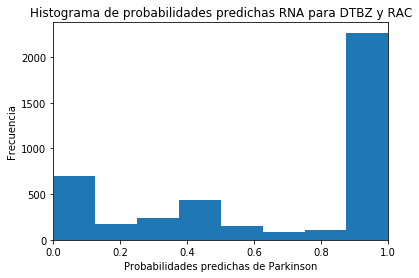

In [34]:
# histograma de probabilidades predichas
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histograma de probabilidades predichas RNA para DTBZ y RAC')
plt.xlabel('Probabilidades predichas de Parkinson')
plt.ylabel('Frecuencia')
#plt.savefig('Histo_nn_todo.png')

In [35]:
# predice Parkinson si la probabilidad pronosticada es mayor a 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [36]:
# Muestra las primeras 10 probabilidades predichas
y_pred_prob[0:10]

array([0.99969564, 0.9441958 , 1.        , 0.9999989 , 0.55756859,
       0.99999999, 0.07473632, 0.99608608, 0.99911357, 0.99999948])

In [37]:
# Matriz de confusión previa (umbral por defecto 0.5)
print(confusion)

[[1257  145]
 [ 293 2459]]


In [38]:
# Nueva matriz de confusión (Umbral de 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 874  528]
 [  71 2681]]


In [39]:
#Guarda nueva matriz de confusión (umbral 0.3)
nueva_conf = metrics.confusion_matrix(y_test, y_pred_class)
VP2 = nueva_conf[1, 1]
VN2 = nueva_conf[0, 0]
FP2 = nueva_conf[0, 1]
FN2 = nueva_conf[1, 0]

In [40]:
# Ha incrementado la Sensibilidad (Solía ser 0.90)
print(VP2 / float(VP2 + FN2))
print(metrics.recall_score(y_test, y_pred_class))

0.9742005813953488
0.9742005813953488


In [41]:
# Ha disminuído la Especificidad (Solía ser 0.90)
print(VN2 / float(VN2 + FP2))

0.62339514978602


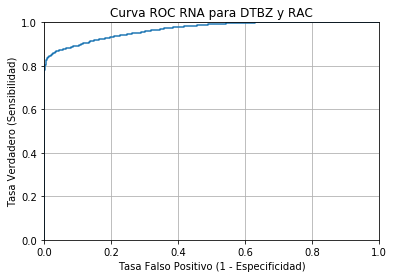

In [42]:
# IMPORTANTE: Pareja ordenada (valores reales, probabilidades predichas)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC RNA para DTBZ y RAC')
plt.xlabel('Tasa Falso Positivo (1 - Especificidad)')
plt.ylabel('Tasa Verdadero (Sensibilidad)')
plt.grid(True)
#plt.savefig('ROC_nn_todo')

In [43]:
def evaluate_threshold(threshold):
    print('Sensitividad:', tpr[thresholds > threshold][-1])
    print('Especificidad:', 1 - fpr[thresholds > threshold][-1])

In [44]:
evaluate_threshold(0.5)

Sensitividad: 0.8928052325581395
Especificidad: 0.8965763195435092


In [45]:
evaluate_threshold(0.3)

Sensitividad: 0.9742005813953488
Especificidad: 0.62339514978602


In [46]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9672965116279069


In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, y, cv=10, scoring='roc_auc').mean()

0.9431742926263059